# ADHD Prediction Using ML and DL


## Download the dataset

In [1]:
import requests
import zipfile
import os

# URL of the zip file
url = 'https://datasets.simula.no/downloads/hyperaktiv.zip'

# The local path where the zip file will be saved
zip_path = '/content/dataset.zip'

# Folder where the contents of the zip will be extracted
extract_folder = '/content/dataset'

# Create the directory if it does not exist
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

# Download the zip file
print("Downloading the file...")
response = requests.get(url)
with open(zip_path, 'wb') as f:
    f.write(response.content)
print("Download completed.")

# Extract the zip file
print("Extracting the file...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)
print("Extraction completed.")

# Optionally, remove the zip file after extraction
os.remove(zip_path)
print("Zip file removed.")


Download completed.
Extracting the file...
Extraction completed.
Zip file removed.


##Import Libraries and Load Data


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, ConvLSTM2D, Flatten, Reshape, LayerNormalization, MultiHeadAttention, Dropout

# Cell 2: Load Data
data_path = '/content/dataset/patient_info.csv'
data = pd.read_csv(data_path, delimiter=';')

# Display the first few rows of the dataset
print(data.head())


   ID  SEX  AGE  ACC  ACC_TIME  ACC_DAYS  HRV  HRV_TIME  HRV_HOURS  CPT_II  \
0   1    0    3    1  16:00:00       6.0    1  11:00:00       21.0       0   
1   2    0    4    1  10:54:00       6.8    0       NaN        NaN       1   
2   3    1    2    1  15:28:00       7.2    1  15:25:00       21.0       1   
3   4    1    3    0       NaN       NaN    1  16:55:00       22.0       1   
4   5    1    1    1  14:24:00       5.9    1  16:00:00       12.0       1   

   ...  HADS_D  MED  MED_Antidepr  MED_Moodstab  MED_Antipsych  \
0  ...     2.0    1           1.0           NaN            NaN   
1  ...     7.0    0           NaN           NaN            NaN   
2  ...     0.0    0           NaN           NaN            NaN   
3  ...     6.0    1           1.0           NaN            NaN   
4  ...     5.0    0           NaN           NaN            NaN   

   MED_Anxiety_Benzo  MED_Sleep  MED_Analgesics_Opioids  MED_Stimulants  \
0                NaN        NaN                     NaN    

##Data Preprocessing

In [3]:
# Assuming 'ADHD' is the target variable and the rest are features
X = data.drop(columns=['ADHD'])
y = data['ADHD']

# Drop non-numeric columns
non_numeric_cols = ['ACC_TIME', 'HRV_TIME', 'CT']  # Add other non-numeric columns as needed
X = X.drop(columns=non_numeric_cols)

# Fill missing values with 0 (or you can use other imputation methods)
X = X.fillna(0)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


# Data Analysis

   ID  SEX  AGE  ACC  ACC_TIME  ACC_DAYS  HRV  HRV_TIME  HRV_HOURS  CPT_II  \
0   1    0    3    1  16:00:00       6.0    1  11:00:00       21.0       0   
1   2    0    4    1  10:54:00       6.8    0       NaN        NaN       1   
2   3    1    2    1  15:28:00       7.2    1  15:25:00       21.0       1   
3   4    1    3    0       NaN       NaN    1  16:55:00       22.0       1   
4   5    1    1    1  14:24:00       5.9    1  16:00:00       12.0       1   

   ...  HADS_D  MED  MED_Antidepr  MED_Moodstab  MED_Antipsych  \
0  ...     2.0    1           1.0           NaN            NaN   
1  ...     7.0    0           NaN           NaN            NaN   
2  ...     0.0    0           NaN           NaN            NaN   
3  ...     6.0    1           1.0           NaN            NaN   
4  ...     5.0    0           NaN           NaN            NaN   

   MED_Anxiety_Benzo  MED_Sleep  MED_Analgesics_Opioids  MED_Stimulants  \
0                NaN        NaN                     NaN    

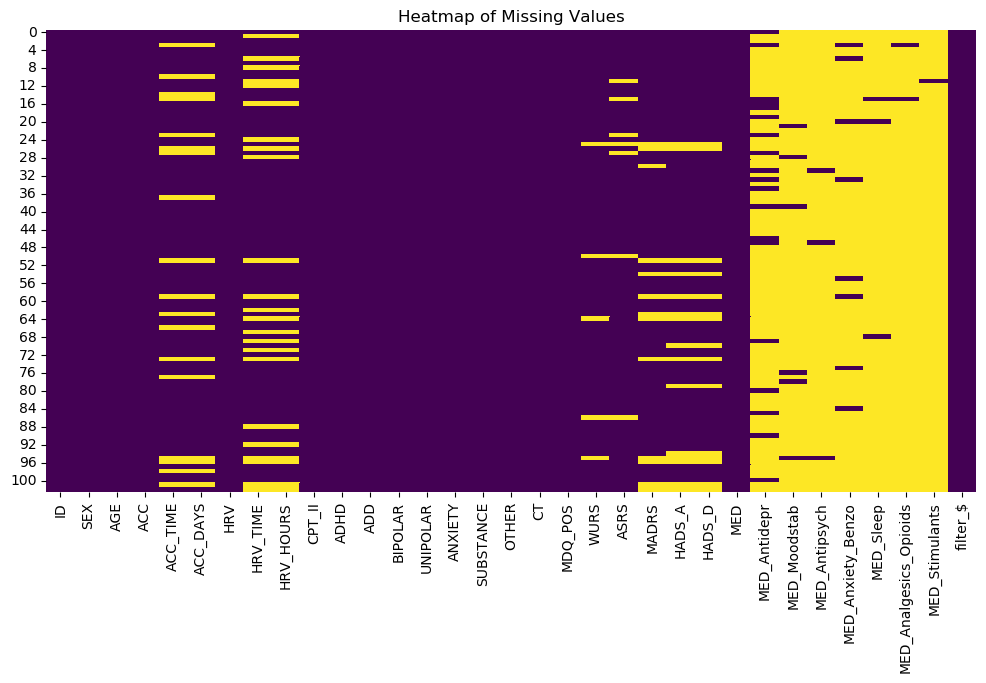

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data_path = '/content/dataset/patient_info.csv'
data = pd.read_csv(data_path, delimiter=';')

# Display the first few rows of the dataset
print(data.head())

# Cell 2: Checking for Missing Values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()



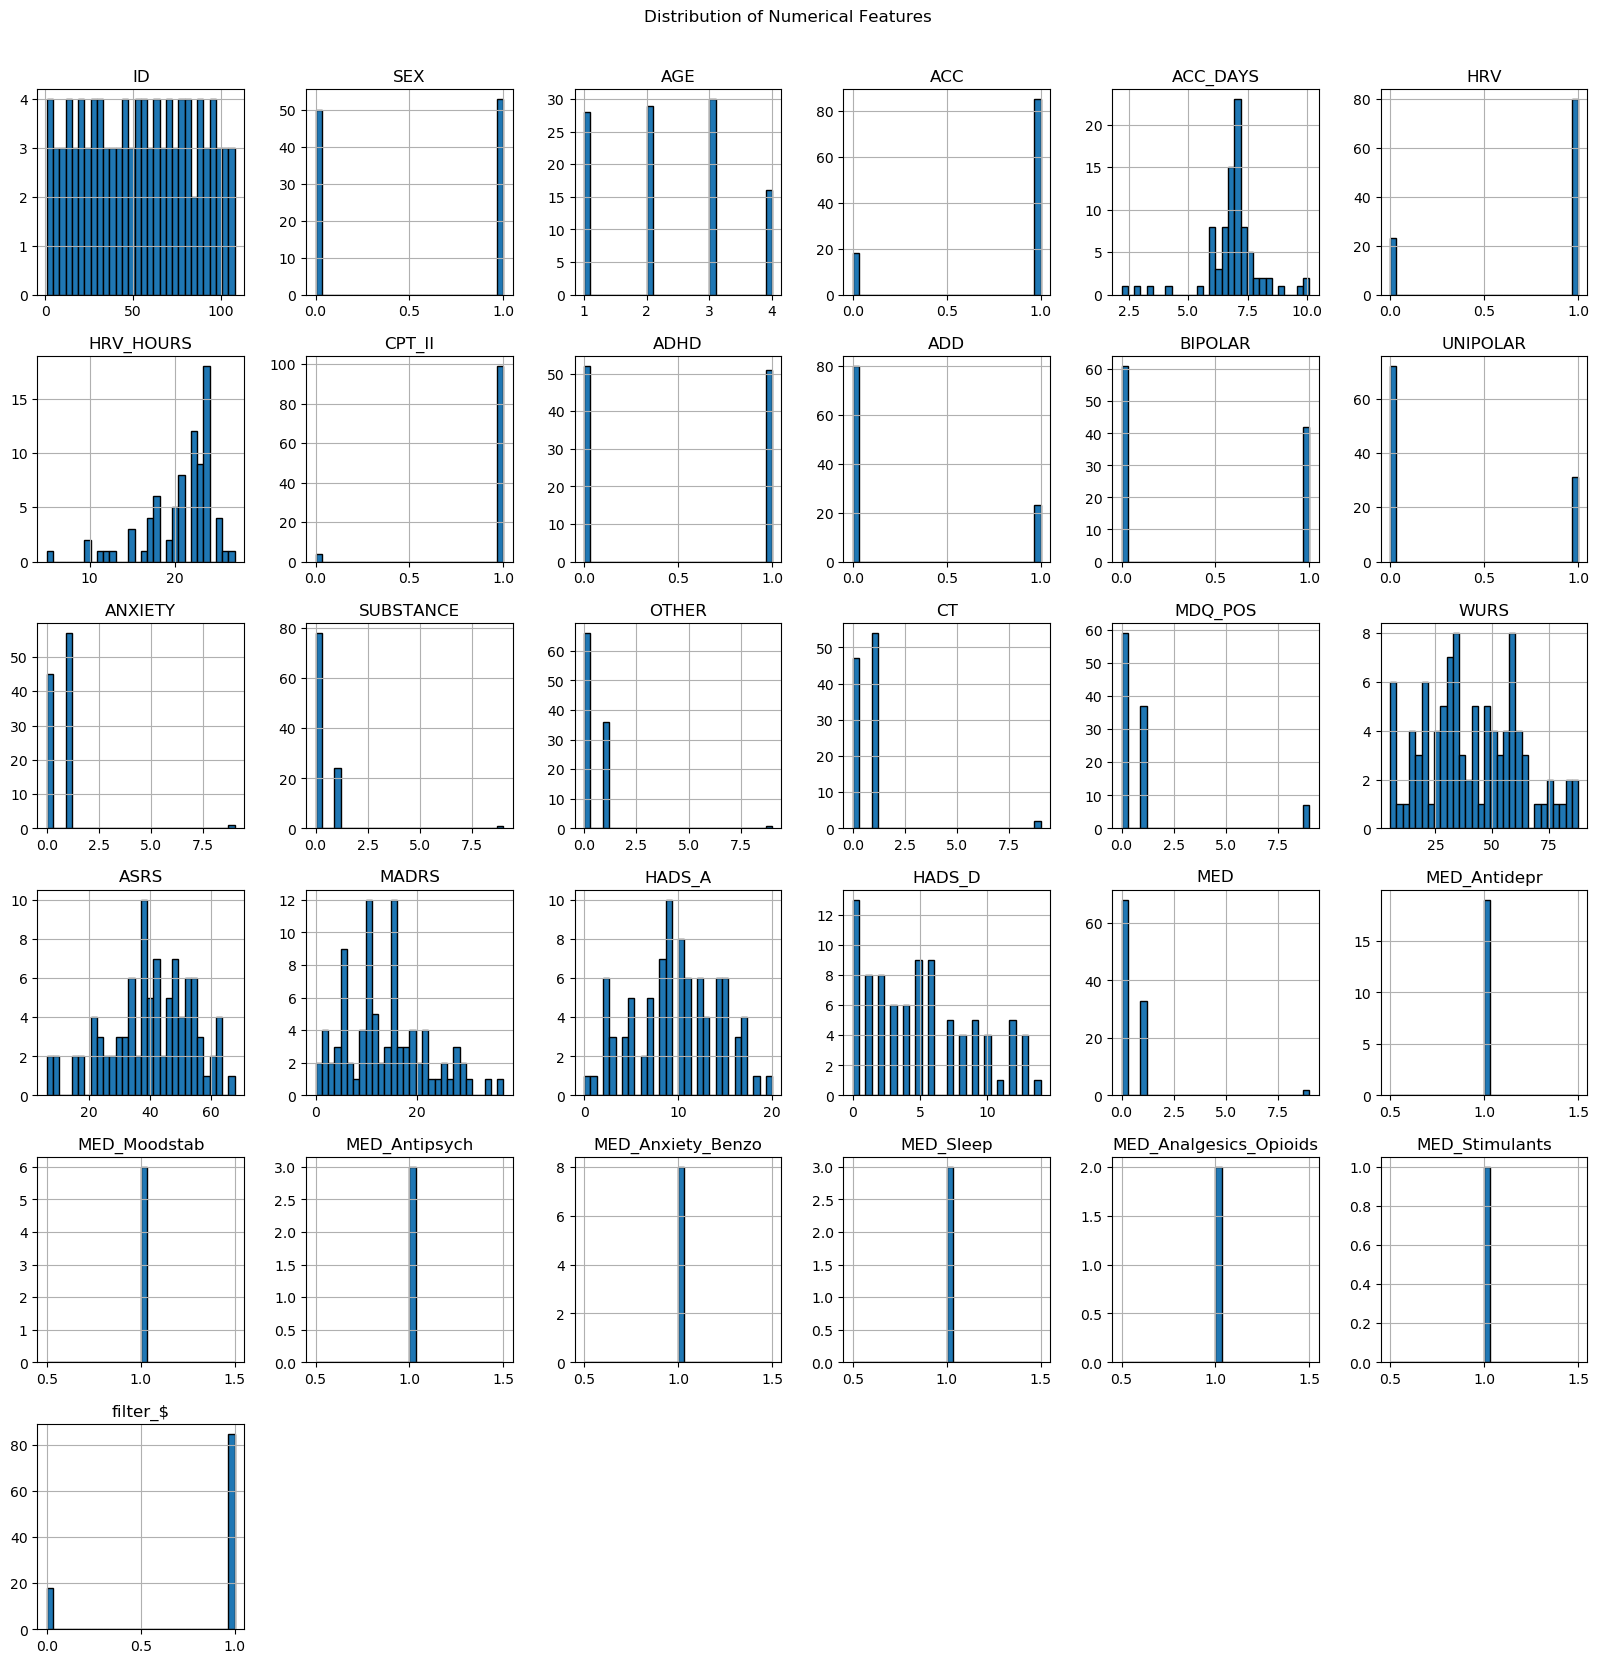

In [7]:
# Cell 3: Distribution of Numerical Features
numeric_columns = data.select_dtypes(include=[float, int]).columns
data[numeric_columns].hist(figsize=(20, 20), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', y=0.92)
plt.show()


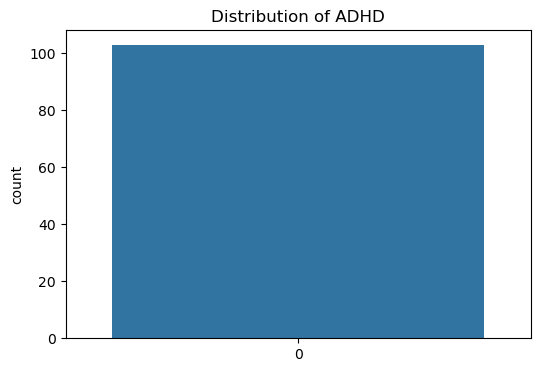

In [8]:

# Cell 4: Distribution of Categorical Features
plt.figure(figsize=(6, 4))
sns.countplot(data['ADHD'])
plt.title('Distribution of ADHD')
plt.show()



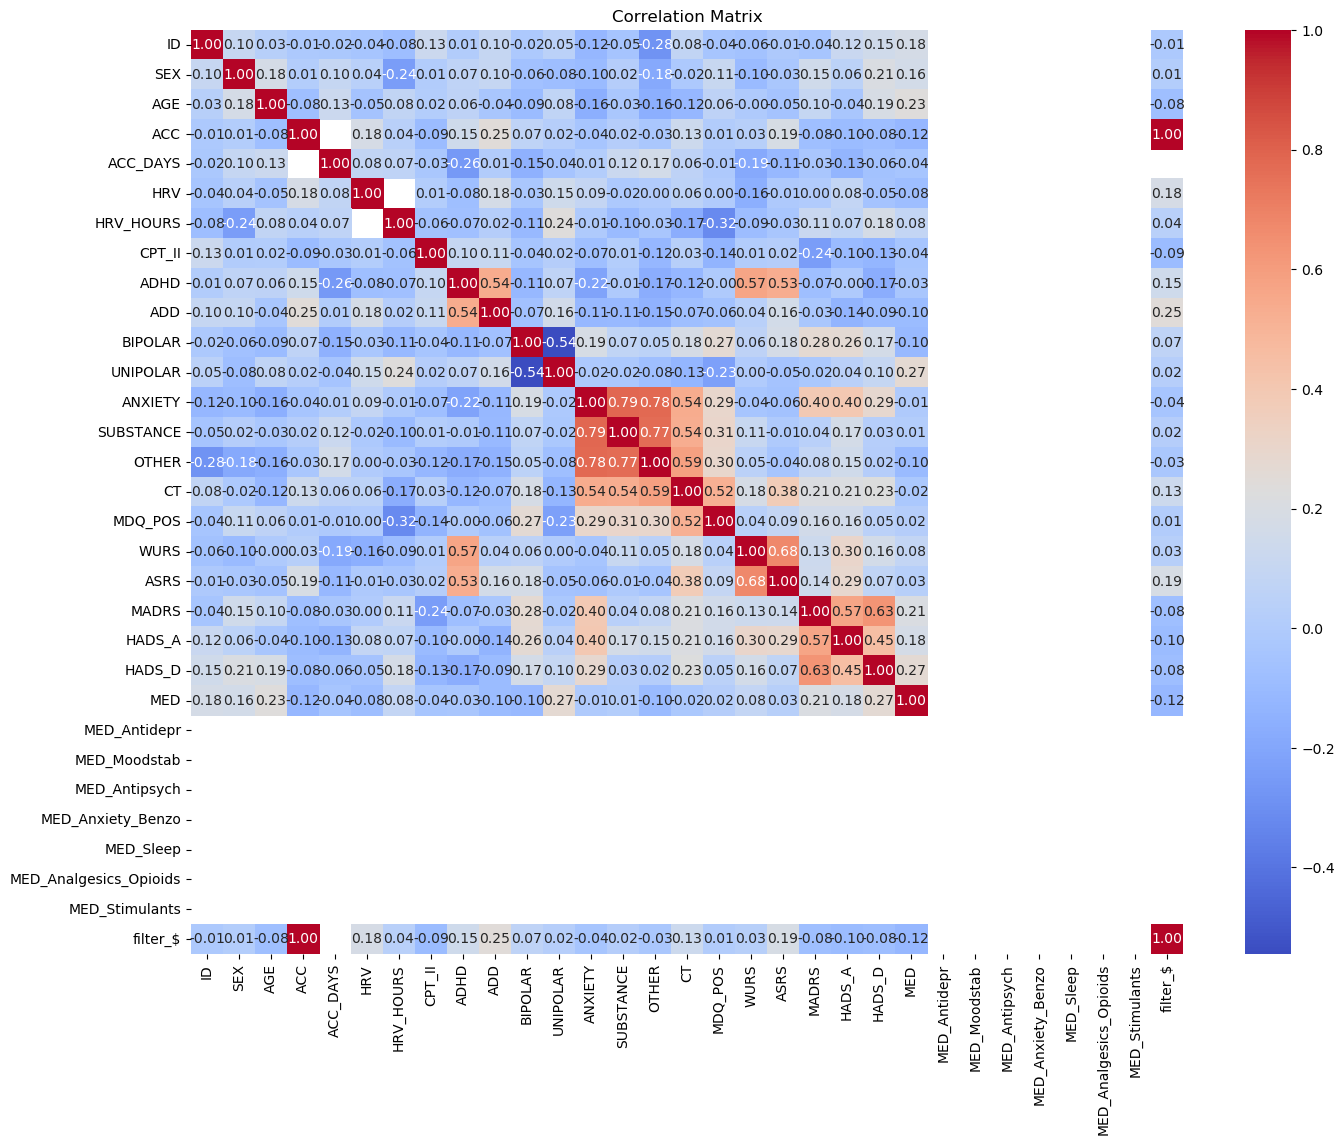

In [9]:
# Cell 5: Correlation Matrix
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[float, int])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()




In [ ]:
# Cell 6: Pairplot for Key Features
selected_features = ['AGE', 'ACC', 'HRV', 'CPT_II', 'ADHD']
sns.pairplot(data[selected_features], hue='ADHD')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


In [ ]:

# Cell 7: Boxplots for Outlier Detection
plt.figure(figsize=(20, 10))
data.boxplot(column=['AGE', 'ACC', 'HRV', 'CPT_II'])
plt.title('Boxplots for Outlier Detection')
plt.show()


In [ ]:

# Cell 8: Violin Plots for Distribution and Density
plt.figure(figsize=(20, 10))
for i, col in enumerate(['AGE', 'ACC', 'HRV', 'CPT_II']):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='ADHD', y=col, data=data)
    plt.title(f'Violin Plot of {col} by ADHD')
plt.tight_layout()
plt.show()

##Model Evaluation

###GRU Model

In [ ]:
# Cell 4: GRU Model
# Reshape data for GRU (requires 3D input)
X_train_gru = np.expand_dims(X_train, axis=2)
X_test_gru = np.expand_dims(X_test, axis=2)

# Define the GRU model
gru_model = Sequential()
gru_model.add(GRU(units=64, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2]), return_sequences=True))
gru_model.add(GRU(units=32))
gru_model.add(Dense(1, activation='sigmoid'))

# Compile the model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the GRU model
gru_history = gru_model.fit(X_train_gru, y_train, epochs=50, validation_data=(X_test_gru, y_test), batch_size=32)

# Evaluate the GRU model
gru_loss, gru_accuracy = gru_model.evaluate(X_test_gru, y_test)
print(f'GRU Model Accuracy: {gru_accuracy}')


###Autoencoder Model

In [ ]:
# Define the Autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 32  # Can be tuned

autoencoder = Sequential([
    Dense(encoding_dim, activation='relu', input_shape=(input_dim,)),
    Dense(input_dim, activation='sigmoid')
])

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder model
autoencoder_history = autoencoder.fit(X_train, X_train, epochs=50, validation_data=(X_test, X_test), batch_size=32)

# Encoder part of the Autoencoder
encoder = Sequential([
    Dense(encoding_dim, activation='relu', input_shape=(input_dim,))
])

# Decoder part of the Autoencoder
decoder = Sequential([
    Dense(input_dim, activation='sigmoid', input_shape=(encoding_dim,))
])

# Use the encoder to transform the data
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Define and train a classifier on the encoded data
classifier = Sequential([
    Dense(32, activation='relu', input_shape=(encoding_dim,)),
    Dense(1, activation='sigmoid')
])
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier_history = classifier.fit(X_train_encoded, y_train, epochs=50, validation_data=(X_test_encoded, y_test), batch_size=32)

# Evaluate the Autoencoder-based classifier
classifier_loss, classifier_accuracy = classifier.evaluate(X_test_encoded, y_test)
print(f'Autoencoder-based Classifier Accuracy: {classifier_accuracy}')


###Convolutional LSTM Model

In [ ]:
# Cell 5: ConvLSTM Model
# Reshape data for ConvLSTM2D (requires 5D input)
X_train_cnn_lstm = np.reshape(X_train, (X_train.shape[0], 1, 1, X_train.shape[1], 1))
X_test_cnn_lstm = np.reshape(X_test, (X_test.shape[0], 1, 1, X_test.shape[1], 1))

# Define the ConvLSTM model
cnn_lstm_model = Sequential()
cnn_lstm_model.add(ConvLSTM2D(filters=64, kernel_size=(1, 1), input_shape=(1, 1, X_train.shape[1], 1), return_sequences=True))
cnn_lstm_model.add(ConvLSTM2D(filters=32, kernel_size=(1, 1), return_sequences=False))
cnn_lstm_model.add(Flatten())
cnn_lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ConvLSTM model
cnn_lstm_history = cnn_lstm_model.fit(X_train_cnn_lstm, y_train, epochs=50, validation_data=(X_test_cnn_lstm, y_test), batch_size=32)

# Evaluate the ConvLSTM model
cnn_lstm_loss, cnn_lstm_accuracy = cnn_lstm_model.evaluate(X_test_cnn_lstm, y_test)
print(f'ConvLSTM Model Accuracy: {cnn_lstm_accuracy}')


###Transformer Model

In [ ]:
# Cell 6: Transformer Model
# Define a simple Transformer block
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [Dense(ff_dim, activation="relu"), Dense(embed_dim)]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs, training=training)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1, training=training)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Define the Transformer model
class TransformerClassifier(tf.keras.Model):
    def __init__(self, num_heads, embed_dim, ff_dim, num_classes):
        super(TransformerClassifier, self).__init__()
        self.transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
        self.flatten = Flatten()
        self.dense = Dense(num_classes, activation='sigmoid')

    def call(self, inputs, training=False):
        x = self.transformer_block(inputs, training=training)
        x = self.flatten(x)
        return self.dense(x)

# Reshape data for Transformer (requires 3D input)
X_train_transformer = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_transformer = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Instantiate and compile the Transformer model
transformer_model = TransformerClassifier(num_heads=4, embed_dim=64, ff_dim=128, num_classes=1)
transformer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Transformer model
transformer_history = transformer_model.fit(X_train_transformer, y_train, epochs=50, validation_data=(X_test_transformer, y_test), batch_size=32)

# Evaluate the Transformer model
transformer_loss, transformer_accuracy = transformer_model.evaluate(X_test_transformer, y_test)
print(f'Transformer Model Accuracy: {transformer_accuracy}')


##Accuracy and Loss Plot For Models

In [ ]:
import matplotlib.pyplot as plt

# Function to plot accuracy and loss
def plot_history(history, model_name):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot for GRU model
plot_history(gru_history, 'GRU Model')

# Plot for Autoencoder-based Classifier model
plot_history(classifier_history, 'Autoencoder-based Classifier')

# Plot for ConvLSTM model
plot_history(cnn_lstm_history, 'ConvLSTM Model')

# Plot for Transformer model
plot_history(transformer_history, 'Transformer Model')


##Model Comparison


In [ ]:
import pandas as pd

# Model results
results = {
    'Model': ['GRU', 'Autoencoder-based Classifier', 'ConvLSTM', 'Transformer'],
    'Accuracy': [gru_accuracy, classifier_accuracy, cnn_lstm_accuracy, transformer_accuracy],
    'Loss': [gru_loss, classifier_loss, cnn_lstm_loss, transformer_loss]
}

# Create a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print("Model Comparison")
print(results_df)


In [ ]:
!pip install tabulate


In [ ]:
import pandas as pd
from tabulate import tabulate

# Model comparison data
data = {
    'Model': ['GRU', 'Autoencoder-based Classifier', 'ConvLSTM', 'Transformer'],
    'Accuracy': [0.714286, 0.761905, 0.809524, 0.523810],
    'Loss': [0.508410, 0.558562, 0.424543, 0.692680]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame as a table with borders
print(tabulate(df, headers='keys', tablefmt='grid'))


#TIME SERIES ANALYSIS


In [ ]:
import pandas as pd
import zipfile
import os

patient_info_path= '/content/dataset/patient_info.csv'

# Load the patient_info.csv file
patient_info_df = pd.read_csv(patient_info_path, delimiter=';')

# Load the ID and ADHD attributes into a dictionary
adhd_dict = pd.Series(patient_info_df['ADHD'].values, index=patient_info_df['ID']).to_dict()

# Display the dictionary
print(adhd_dict)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the path to the extracted files
extract_path = '/content/dataset'

# Define the path to the activity data folder
activity_data_folder = os.path.join(extract_path, 'activity_data')

# Define the function to plot time series data
def preprocess_and_plot(activity_files, activity_data_folder, adhd_dict):
    plt.figure(figsize=(14, 8))

    for file in activity_files:
        # Extract patient ID from the file name
        patient_id = int(file.split('_')[-1].split('.')[0])

        # Get the ADHD attribute for the patient
        adhd_value = adhd_dict.get(patient_id, 0)

        # Load the activity file
        file_path = os.path.join(activity_data_folder, file)
        activity_df = pd.read_csv(file_path, delimiter=';')

        # Ensure that the data has a time column for the x-axis
        activity_df['TIMESTAMP'] = pd.to_datetime(activity_df['TIMESTAMP'])
        activity_df['ACTIVITY'] = pd.to_numeric(activity_df['ACTIVITY'])

        # Plot the time series data
        color = 'red' if adhd_value == 1 else 'blue'
        plt.plot(activity_df['TIMESTAMP'], activity_df['ACTIVITY'], color=color)

    # Add legend entries
    red_patch = plt.Line2D([0], [0], color='red', label='ADHD = True')
    blue_patch = plt.Line2D([0], [0], color='blue', label='ADHD = False')
    plt.legend(handles=[red_patch, blue_patch])

    plt.xlabel('Time')
    plt.ylabel('Activity Value')
    plt.title('Time Series Analysis of Patient Activities')
    plt.show()

# List all activity data files
activity_files = [f for f in os.listdir(activity_data_folder) if f.startswith('patient_activity_') and f.endswith('.csv')]

# Plot time series data
preprocess_and_plot(activity_files, activity_data_folder, adhd_dict)
